### Dependencies

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
pd.set_option('display.max_columns', None)

### Importing the Dataset

In [9]:
df = pd.read_csv('../Compiled_Campaign_Data.csv')

In [10]:
df = df.drop_duplicates(['project_id'], keep='first')

In [11]:
df.shape

(182264, 49)

In [12]:
df['project_id'].nunique()

182264

### Adding Features

Creating a row to record the launch date of campaigns

In [13]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [14]:
labels = [2009, 2010, 2011, 2012, 2013, 2014, 
          2015, 2016, 2017, 2018, 2019]
date_bins = pd.date_range('2008-01-01 23:59:59', 
                          freq='1Y', 
                          periods=12)
df['created_year'] = pd.cut(df['created_at'], 
                            date_bins, 
                            labels=labels)

Creating a column to record the usd_per_pledge

In [15]:
df['usd_per_pledge'] = ( df['usd_pledged'] / df['backers_count'] )

Creating a binary column which denotes whether a campaign is succssful or not (1=successful, 0=failed/suspended/cancelled, np.nan=live)

In [16]:
df['bin_state'] = df['state']
df['bin_state'] = df['bin_state'].replace({
    'successful': 1,
    'live': np.nan,
    'failed': 0,
    'suspended': 0,
    'canceled': 0
})

### Subsetting the Dataset

Creating a dataset with just successful campaigns

In [17]:
successful = df[ df['state'] == 'successful' ]

In [18]:
successful.shape

(94778, 52)

Creating a dataframe with just US-based campaigns

In [19]:
us = df[ df['loc_country'] == 'US' ]
us['loc_state'].nunique()

51

### Visualizing the change in campaigns over time

In [20]:
year_counts = df[ df['created_year'] > 2013]['created_year'].value_counts()[:6]
year_counts = year_counts.sort_index()[:5]

Now that we have the data we want to visualize, we will use matplotlib

In [22]:
year_counts = year_counts.to_frame()

In [23]:
year_counts.columns

Index(['created_year'], dtype='object')

In [24]:
year_counts = year_counts.rename(columns={'created_year':'Number of Campaigns'})

In [25]:
year_counts['Percent Change'] = [0, .26, -.25, -.02, .03]
year_counts['Index'] = [1,1.26,0.95,0.93,0.96]

In [ ]:
year_counts['Kickstarter Reported'] = []

In [26]:
year_counts

,Number of Campaigns,Percent Change,Index
2014,29195,0.00,1.00
2015,36714,0.26,1.26
2016,27713,-0.25,0.95
2017,27146,-0.02,0.93
2018,28014,0.03,0.96


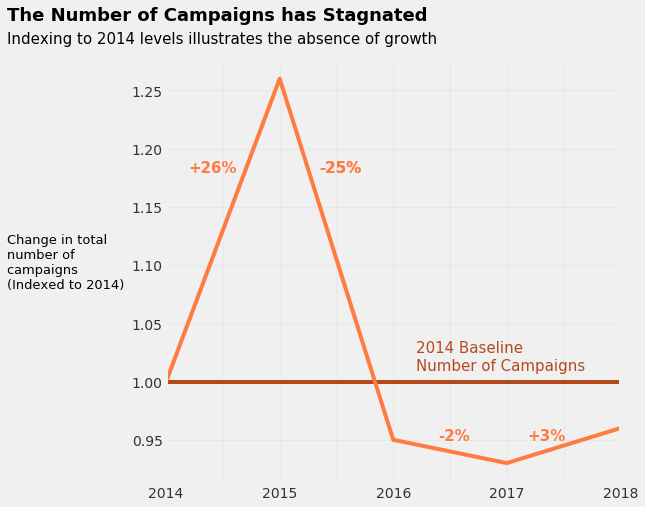

In [70]:
# Adjust figure size
fig, ax = plt.subplots(figsize=(7.25,7.25))

# Add title
ax.text(x=-1.4,
        y=1.31, 
        s="The Number of Campaigns has Stagnated",
        fontsize=18,
        fontweight='bold')
ax.text(x=-1.4,
        y=1.29, 
        s="Indexing to 2014 levels illustrates the absence of growth",
        fontsize=15,
        fontweight='normal')

ax.axhline(y=1, color='#B34A1D')

# Adjust color of gridlines
ax.grid(alpha=0.2, linewidth=1.25)
year_counts['Index'].plot.line(ax=ax, 
                     color='#FF7B42')

#Place Growth Rate Labels
ax.text(x=.2,
        y=1.18, 
        s="+26%",
        fontsize=15,
        color='#FF7B42',
        fontweight='bold')
ax.text(x=1.35,
        y=1.18, 
        s="-25%",
        fontsize=15,
        color='#FF7B42',
        fontweight='bold')
ax.text(x=1.35,
        y=1.18, 
        s="-25%",
        fontsize=15,
        color='#FF7B42',
        fontweight='bold')
ax.text(x=2.4,
        y=0.95, 
        s="-2%",
        fontsize=15,
        color='#FF7B42',
        fontweight='bold')
ax.text(x=3.18,
        y=0.95, 
        s="+3%",
        fontsize=15,
        color='#FF7B42',
        fontweight='bold')

ax.text(x=2.2,
        y=1.01, 
        s="2014 Baseline \nNumber of Campaigns",
        fontsize=15,
        color='#B34A1D',
        fontweight='normal')

ax.text(x=-1.4,
        y=1.08, 
        s="Change in total \nnumber of \ncampaigns \n(Indexed to 2014)",
        fontsize=13,
        fontweight='normal')

ax.tick_params(axis='both', colors='#343231')
# Set y-axis label
#ax.set_ylabel('Change in total number of campaigns (Indexed to 2014)', fontsize=13)

plt.savefig('indexed_number_of_campaigns.png', bbox_inches='tight')

plt.show()

### Visualizing the amount raised by successful campaigns

In [28]:
import seaborn as sns

Subset the dataframe

In [29]:
years = successful[(successful['created_year'] > 2013)]
years = years[(years['created_year'] < 2019)]
years = years.reset_index(drop=True)
years['created_year'].cat.remove_unused_categories(inplace=True)

Build a boxplot visualization

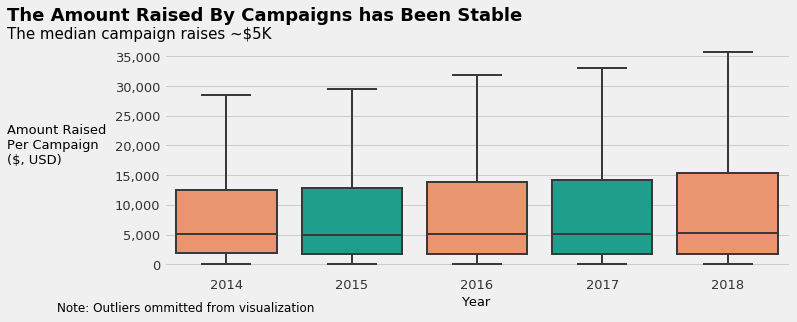

In [94]:
#sns.set(style='whitegrid')
plt.style.use('fivethirtyeight')
# Adjust figure size
fig, ax = plt.subplots(figsize=(10,4))

box_colors = {2014: "#FF8D5C", 2015: "#0BB39C", 2016:"#FF8D5C", 2017:"#0BB39C", 2018:"#FF8D5C"}

ax = sns.boxplot(y=years['usd_pledged'],
                 x=years['created_year'],
                 linewidth=2,
                 palette=box_colors,
                 showfliers=False);

# Add title
ax.text(x=-1.75,
        y=41000, 
        s="The Amount Raised By Campaigns has Been Stable",
        fontsize=18,
        fontweight='bold')
ax.text(x=-1.75,
        y=38000, 
        s="The median campaign raises ~$5K",
        fontsize=15,
        fontweight='normal')
ax.text(x=-1.75,
        y=17000, 
        s="Amount Raised\nPer Campaign\n($, USD)",
        fontsize=13,
        fontweight='normal')
ax.text(x=-1.35,
        y=-8000, 
        s="Note: Outliers ommitted from visualization",
        fontsize=12,
        fontweight='normal')

# Set location of x-axis ticks
ax.set(yticks=[0, 5000, 10000, 15000, 20000,25000,30000,35000]
      )

# Set x-axis tick labels (not strictly neccesary in this case)
ax.set_yticklabels( ["0", "5,000", "10,000", "15,000", "20,000","25,000","30,000","35,000"] )

# Set x-axis label
ax.set_xlabel('Year', fontsize=13)
              
# Set x-axis label
ax.set_ylabel('')

# Set font-size of axes
ax.tick_params(axis='both', labelsize=13, colors='#343231')

plt.savefig('campaign_raise.png', bbox_inches='tight')

### Visualizing the average amount pledged per backer

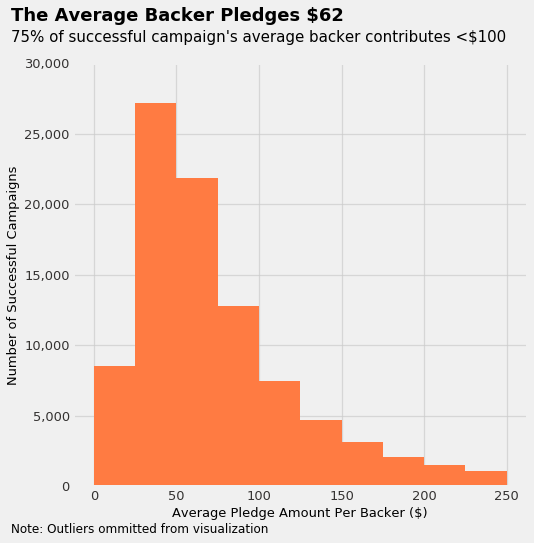

In [89]:
# Adjust figure size
fig, ax = plt.subplots(figsize=(7.25,7.25))

# Adjust color of gridlines
ax.grid(alpha=0.7, linewidth=1.25)

ax.hist(successful['usd_per_pledge'], range=(0,250), color='#FF7B42');

# Add title
ax.text(x=-50,
        y=33000, 
        s="The Average Backer Pledges $62",
        fontsize=18,
        fontweight='bold')
ax.text(x=-50,
        y=31500, 
        s="75% of successful campaign's average backer contributes <$100",
        fontsize=15,
        fontweight='normal')

ax.text(x=-50,
        y=-3300, 
        s="Note: Outliers ommitted from visualization",
        fontsize=12,
        fontweight='normal')

# Set location of x-axis ticks
ax.set(yticks=[0, 5000, 10000, 15000, 20000, 25000, 30000]
      )

# Set x-axis tick labels (not strictly neccesary in this case)
ax.set_yticklabels( ["0", "5,000", "10,000", "15,000", "20,000", "25,000", "30,000"] )

# Set x-axis label
ax.set_xlabel('Average Pledge Amount Per Backer ($)', fontsize=13)
ax.set_ylabel('Number of Successful Campaigns', fontsize=13)

# Set font-size of axes
ax.tick_params(axis='both', labelsize=13, colors='#343231')

plt.savefig('pledge_amounts.png', bbox_inches='tight')

# Show plot without extra output
plt.show()

### Visualizing the impact of Kickstarter's editorial staff

Subsetting the dataframe

In [41]:
editorial = pd.crosstab(df['bin_state'], df['staff_pick'], margins=False, normalize='columns' )
editorial

staff_pick,False,True
bin_state,,
0.0,0.517687,0.115951
1.0,0.482313,0.884049


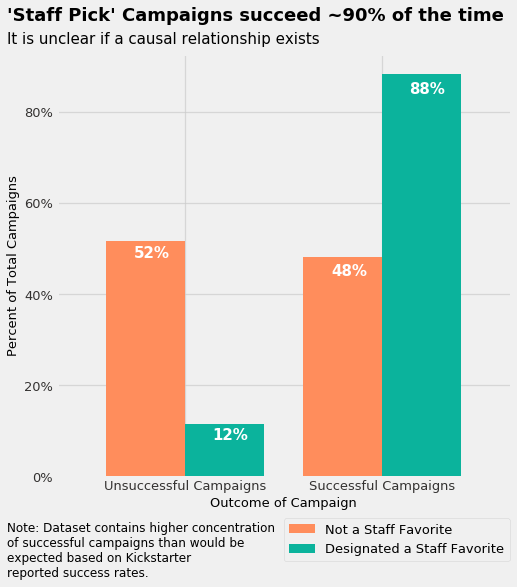

In [93]:
fig, ax = plt.subplots(figsize=(7.25,7.25))

ax.grid(alpha=0.7, linewidth=1.25)

editorial.plot.bar(ax=ax, width=0.8, color=('#FF8D5C', '#0BB39C') )

# Set location of x-axis ticks
ax.set(yticks=[0, 0.2, 0.4, 0.6, 0.8]
      )

ax.text(x=-0.9,
        y=1, 
        s="'Staff Pick' Campaigns succeed ~90% of the time",
        fontsize=18,
        fontweight='bold')
ax.text(x=-0.9,
        y=0.95, 
        s="It is unclear if a causal relationship exists",
        fontsize=15,
        fontweight='normal')
ax.text(x=-.26,
        y=.48, 
        s="52%",
        fontsize=15,
        fontweight='bold',
        color='white')
ax.text(x=.14,
        y=.08, 
        s="12%",
        fontsize=15,
        fontweight='bold',
        color='white')
ax.text(x=.74,
        y=.44, 
        s="48%",
        fontsize=15,
        fontweight='bold',
        color='white')
ax.text(x=1.135,
        y=.84, 
        s="88%",
        fontsize=15,
        fontweight='bold',
        color='white')
ax.text(x=-.9,
        y=-.22, 
        s="Note: Dataset contains higher concentration \nof successful campaigns than would be \nexpected based on Kickstarter \nreported success rates.",
        fontsize=12,
        fontweight='normal')

# Set x-axis tick labels (not strictly neccesary in this case)
ax.set_yticklabels( ["0%", "20%", "40%", "60%", "80%"] )
ax.set_xticklabels( ["Unsuccessful Campaigns", "Successful Campaigns"],
                   rotation='horizontal')

# Set x-axis label
ax.set_xlabel('Outcome of Campaign', fontsize=13)
ax.set_ylabel('Percent of Total Campaigns', fontsize=13)

ax.tick_params(axis='both', labelsize=13, colors='#343231')

#ax.legend(loc=(0,0))
ax.legend(labels=('Not a Staff Favorite', 'Designated a Staff Favorite'),
         fontsize=13,
         fancybox=None,
         framealpha=None,
         loc=(0.5,-.2))

plt.savefig('staff_picks.png', bbox_inches='tight')

plt.show()

### Visualizing the success rate of campaigns based on origin

Since this visualization utilizes Altair it was completed in a separate notebook. Please refer to the other Visualization notebook in the repository. 